In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from pandas_datareader import data as web
import scipy.optimize as sco
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas_datareader.data as web

In [2]:
initial_investment = 500000

In [3]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 43.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=575822962a23a5b959479df40b275e118ebdebc585ca5d21bb5aa5d8113edce2
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:

import yfinance as yf

data = yf.download('MSFT','2021-03-05','2021-09-05')

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-05,229.520004,233.270004,226.460007,231.600006,230.624939,41872800
2021-03-08,231.369995,233.369995,227.130005,227.389999,226.432663,35267400
2021-03-09,232.880005,235.380005,231.669998,233.779999,232.795746,33080500
2021-03-10,237.000000,237.000000,232.039993,232.419998,231.441483,29746800
2021-03-11,234.960007,239.169998,234.309998,237.130005,236.131653,29907600


In [6]:
data.rename({'Adj Close': 'MSFT Close'}, axis = 1 , inplace = True)
data = data.reset_index()
data.drop(['Open','High','Low','Close','Volume'],axis = 1, inplace = True)

In [7]:

data1 = yf.download('AAPL','2021-03-05','2021-09-05')
data1.rename({'Adj Close': 'AAPL Close'}, axis = 1 , inplace = True)
data1 = data1.reset_index()
data1.drop(['Open','High','Low','Close','Volume'],axis = 1, inplace = True)

[*********************100%***********************]  1 of 1 completed


In [8]:
data2 = yf.download('FB','2021-03-05','2021-09-05')
data2.rename({'Adj Close': 'FB Close'}, axis = 1 , inplace = True)
data2 = data2.reset_index()
data2.drop(['Open','High','Low','Close','Volume'],axis = 1, inplace = True)

[*********************100%***********************]  1 of 1 completed


In [9]:
data3 = yf.download('C','2021-03-05','2021-09-05')
data3.rename({'Adj Close': 'C Close'}, axis = 1 , inplace = True)
data3 = data3.reset_index()
data3.drop(['Open','High','Low','Close','Volume'],axis = 1, inplace = True)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.columns

Index(['Date', 'MSFT Close'], dtype='object')

In [11]:
data = pd.merge(data,data1, on = 'Date', how = 'left')

In [12]:
data = pd.merge(data,data2 ,on = 'Date', how = 'left')


In [13]:
data = pd.merge(data,data3 ,on = 'Date', how = 'left')

In [14]:
data

,Date,MSFT Close,AAPL Close,FB Close,C Close
0,2021-03-05,230.624939,121.032768,264.279999,69.228012
1,2021-03-08,226.432663,115.988907,255.309998,71.189613
2,2021-03-09,232.795746,120.703819,265.739990,69.977165
3,2021-03-10,231.441483,119.597374,264.899994,72.697784
4,2021-03-11,236.131653,121.571045,273.880005,72.264061
...,...,...,...,...,...
123,2021-08-30,303.589996,153.119995,380.660004,71.669998
124,2021-08-31,301.880005,151.830002,379.380005,71.910004
125,2021-09-01,301.829987,152.509995,382.049988,71.309998
126,2021-09-02,301.149994,153.649994,375.279999,71.500000


In [15]:
returns = data.iloc[:,1:].pct_change()

In [16]:
returns.dropna(inplace = True)

In [17]:
returns

,MSFT Close,AAPL Close,FB Close,C Close
1,-0.018178,-0.041674,-0.033941,0.028335
2,0.028101,0.040650,0.040852,-0.017031
3,-0.005817,-0.009167,-0.003161,0.038879
4,0.020265,0.016503,0.033900,-0.005966
5,-0.005820,-0.007625,-0.020009,0.025508
...,...,...,...,...
123,0.012912,0.030417,0.021550,-0.018085
124,-0.005633,-0.008425,-0.003363,0.003349
125,-0.000166,0.004479,0.007038,-0.008344
126,-0.002253,0.007475,-0.017720,0.002664


In [18]:
covariance_matrix = returns.cov()

In [19]:
covariance_matrix

,MSFT Close,AAPL Close,FB Close,C Close
MSFT Close,0.000133,0.000123,0.000106,-0.000019
AAPL Close,0.000123,0.000201,0.000128,-0.000022
FB Close,0.000106,0.000128,0.000310,0.000005
C Close,-0.000019,-0.000022,0.000005,0.000211


In [20]:
average_returns = returns.mean()

In [21]:
average_returns

MSFT Close    0.002169
AAPL Close    0.002014
FB Close      0.002938
C Close       0.000323
dtype: float64

In [22]:
weights = np.array([.25,.4,.1,.25])

In [23]:
portfolio_returns_mean = average_returns.dot(weights)

In [24]:
portfolio_returns_mean

0.0017220643000590988

In [25]:
portfolio_stdev = np.sqrt(weights.T.dot(covariance_matrix).dot(weights))

In [26]:
portfolio_stdev

0.009506453673320817

In [27]:
mean_investment = (1+portfolio_returns_mean) * initial_investment

In [28]:
mean_investment

500861.03215002955

In [29]:
stdev_investment = initial_investment * portfolio_stdev

In [30]:
conf_level = 0.05


from scipy.stats import norm

cutoff = norm.ppf(conf_level, mean_investment, stdev_investment)

In [31]:
var = initial_investment - cutoff
var

6957.330251974403

In [32]:
#Here we are saying with 95% confidence that our portfolio of 50000 USD will not exceed losses greater than 6957.75 USD over a one day period.

1 day VaR @ 95% confidence: 6957.33
2 day VaR @ 95% confidence: 9839.15
3 day VaR @ 95% confidence: 12050.45
4 day VaR @ 95% confidence: 13914.66
5 day VaR @ 95% confidence: 15557.06
6 day VaR @ 95% confidence: 17041.91
7 day VaR @ 95% confidence: 18407.37


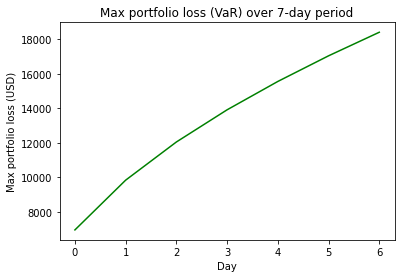

In [33]:
var_array = []

num_days = int(7)

for x in range(1, num_days+1):    

    var_array.append(np.round(var * np.sqrt(x),2))

    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var * np.sqrt(x),2)))



# Build plot

plt.xlabel("Day")

plt.ylabel("Max portfolio loss (USD)")

plt.title("Max portfolio loss (VaR) over 7-day period")

plt.plot(var_array, "g")